In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
# (Make sure titanic.csv is in the same folder as this notebook)
df = pd.read_excel("ny_citibikes_raw.xlsx")

# Show first few rows
df.head()


,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
3,2017-01-01 01:56:00,2017-01-01 02:00:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
4,2017-01-01 02:12:00,2017-01-01 02:23:00,3270,Jersey & 6th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday


## 1. Dataset Exploration

  - What information does each column contain?

In [43]:
df.columns

Index(['Start Time', 'Stop Time', 'Start Station ID', 'Start Station Name',
       'End Station ID', 'End Station Name', 'Bike ID', 'User Type',
       'Birth Year', 'Age', 'Age Groups', 'Trip Duration',
       'Trip_Duration_in_min', 'Month', 'Season', 'Temperature', 'Weekday'],
      dtype='object')

  - Are there missing or duplicated values?

In [44]:
df.duplicated().value_counts()
df.dropna()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
3,2017-01-01 01:56:00,2017-01-01 02:00:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
4,2017-01-01 02:12:00,2017-01-01 02:23:00,3270,Jersey & 6th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,2017-03-31 21:06:00,2017-03-31 21:10:00,3186,Grove St PATH,3203,Hamilton Park,24608,Subscriber,1968,53,45-54,244,4,3,Spring,18,Friday
20396,2017-03-31 21:13:00,2017-03-31 21:18:00,3195,Sip Ave,3194,McGinley Square,29219,Subscriber,1956,65,65-74,264,4,3,Spring,18,Friday
20397,2017-03-31 21:13:00,2017-03-31 21:18:00,3195,Sip Ave,3194,McGinley Square,29219,Subscriber,1956,65,65-74,264,4,3,Spring,18,Friday
20398,2017-03-31 21:26:00,2017-03-31 21:30:00,3195,Sip Ave,3201,Dey St,29276,Subscriber,1970,51,45-54,239,4,3,Spring,18,Friday


In [45]:
df.isna().sum()


Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        1
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64

  - What is the overall time span of the trips?

In [46]:
print(f'La duracion es: {int(df.Trip_Duration_in_min.mean())}')


La duracion es: 9


## 2. Basic Statistics

  - What is the average trip duration (in minutes)?

In [47]:
print(f'La media son: {int(df.Trip_Duration_in_min.mean())} minutos')

La media son: 9 minutos


  - What is the minimum and maximum duration?

In [48]:
print(f'La minima son {df.Trip_Duration_in_min.min()} minutos y la maxima son: {df.Trip_Duration_in_min.max()} minutos')

La minima son 1 minutos y la maxima son: 6515 minutos


  - What are the most common start and end stations?

In [49]:
print(f'La estacion mas comun es: {df["Start Station Name"].value_counts().index[0]} y la estacion que se usa mas al terminar es: {df["End Station Name"].value_counts().index[0]}')


La estacion mas comun es: Grove St PATH y la estacion que se usa mas al terminar es: Grove St PATH


## 3. Users and Demographics

  - How many unique bikes were used?

In [50]:
print(f'Las bicicletas unicas usadas fueron: {df["Bike ID"].value_counts().nunique()}')

Las bicicletas unicas usadas fueron: 96


  - What are the proportions of user types (Subscriber vs Customer)?

In [51]:
df["User Type"].value_counts(normalize=True).round(2)*100

User Type
Subscriber       98.0
One-time user     2.0
Name: proportion, dtype: float64

  - What is the age distribution of the users? Which age group uses the service the most?

In [52]:
print(f'Estos son los primeros 5 edades en porcentaje {df["Age"].value_counts(normalize=True).round(2).head()*100}')

Estos son los primeros 5 edades en porcentaje Age
37    10.0
32     6.0
35     5.0
41     5.0
38     5.0
Name: proportion, dtype: float64


In [53]:
df["Age Groups"].value_counts()

Age Groups
35-44    9247
25-34    4936
45-54    3581
55-64    1749
65-74     760
75+        67
18-24      60
Name: count, dtype: int64

##  4. Temporal Analysis

  - How does the number of trips vary by weekday?

In [54]:
df.Weekday.value_counts()

Weekday
Wednesday    4002
Thursday     3635
Monday       3051
Friday       2958
Tuesday      2937
Sunday       1915
Saturday     1902
Name: count, dtype: int64

- Which month or season has the most rides?

In [55]:
print(f'El mes con mas viajes fue: {df.Month.value_counts().index[0]} y la estacion con mas viajes es: {df.Season.value_counts().index[0]}')

El mes con mas viajes fue: 3 y la estacion con mas viajes es: Winter


- What time of day do most trips start?

In [56]:
df["Start Time"].dt.hour.value_counts().head(5)

Start Time
8     2650
18    2160
17    2048
7     1465
19    1447
Name: count, dtype: int64

## 5. Geographic Analysis

  - Which station pairs (start → end) appear most often?

In [57]:
df.columns

Index(['Start Time', 'Stop Time', 'Start Station ID', 'Start Station Name',
       'End Station ID', 'End Station Name', 'Bike ID', 'User Type',
       'Birth Year', 'Age', 'Age Groups', 'Trip Duration',
       'Trip_Duration_in_min', 'Month', 'Season', 'Temperature', 'Weekday'],
      dtype='object')

In [58]:
df_Estacion = df[df["Start Station Name"] == df["End Station Name"]]
print(f'Las estaciones donde coinciden tanto le inicio como el final es : {df_Estacion["Start Station Name"].value_counts().index[0]} con una cantiad de veces: {df_Estacion["Start Station Name"].value_counts().values[0]}')

Las estaciones donde coinciden tanto le inicio como el final es : Newport Pkwy con una cantiad de veces: 67


 - Are there any stations that appear only as start or only as end stations?

In [59]:
df["Start Station Name"].value_counts()<=1
estacion_min=df["End Station Name"].value_counts()

#Con el metodo map() se asiga un conteo de cada estacion. luego aplica la condicion directamente al mapeo alienada con los booleans

df[df["End Station Name"].map(estacion_min)<= 1 ]

 

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
7412,2017-02-15 14:39:00,2017-02-15 15:08:00,3200,MLK Light Rail,3274,Bethune Center,26173,One-time user,1984,37,35-44,1762,29,2,Winter,16,Wednesday
9957,2017-02-25 16:26:00,2017-02-25 17:00:00,3198,Heights Elevator,297,E 15 St & 3 Ave,24405,Subscriber,1986,35,35-44,2012,34,2,Winter,11,Saturday
12614,2017-03-05 12:38:00,2017-03-05 12:53:00,3186,Grove St PATH,3426,JCBS Depot,26185,Subscriber,1991,30,25-34,937,16,3,Spring,14,Sunday
17953,2017-03-24 19:45:00,2017-03-29 08:20:00,3183,Exchange Place,3442,Indiana,24664,One-time user,1984,37,35-44,390893,6515,3,Spring,15,Friday


## 6. Temperature and Duration

- Is there any visible relationship between temperature and trip duration?

In [60]:
print(f'La relacion entre ambas columnas es {df["Temperature"].corr(df["Trip Duration"]).round(4)} y la correlacion abostula es:{abs(df["Temperature"].corr(df["Trip Duration"]).round(4))} al se tan proximo su valor abs a 0, la fuerza es menor por tanto no hya relacion entre ambas columnas')

La relacion entre ambas columnas es -0.0036 y la correlacion abostula es:0.0036 al se tan proximo su valor abs a 0, la fuerza es menor por tanto no hya relacion entre ambas columnas


  - How does average trip duration vary by season?

In [61]:
df.columns

Index(['Start Time', 'Stop Time', 'Start Station ID', 'Start Station Name',
       'End Station ID', 'End Station Name', 'Bike ID', 'User Type',
       'Birth Year', 'Age', 'Age Groups', 'Trip Duration',
       'Trip_Duration_in_min', 'Month', 'Season', 'Temperature', 'Weekday'],
      dtype='object')

In [62]:
df.groupby("Season")["Trip Duration"].mean()



Season
Spring    568.525885
Winter    559.632191
Name: Trip Duration, dtype: float64

## 7. Summary and Interpretation

  - Write a short summary (5–10 lines) of your findings.

-La mayoria de los suscritproes son un 98%
-Los viajes tienen una duracion media de 9 min y la hora punta a las 8 y en el mes de marzo
-La franja de edad mas utilizada es de 35 a 44 y la indiviual seria de 37
-Las estaciones donde coinciden tanto le inicio como el final es: Newport Pkwy con una cantiad de veces: 67
-

  - Mention patterns, anomalies, or interesting trends you observed.

In [63]:
varianza=df["Age"].value_counts(normalize=True).round(2)*100



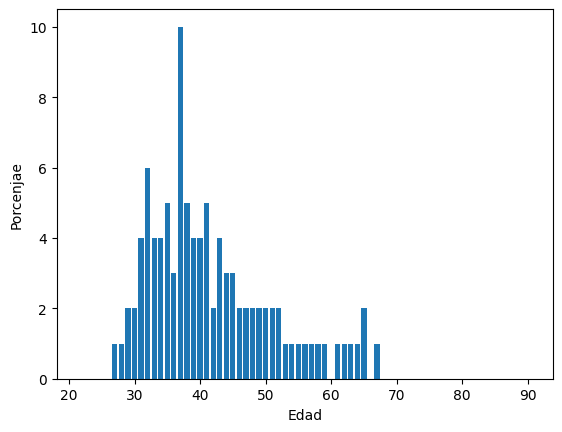

In [69]:
plt.bar(varianza.index, varianza.values)
plt.xlabel("Edad")
plt.ylabel("Porcenjae")
plt.show()